In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
realestate = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-lavrukhin/sales.csv', parse_dates= ['ConveyanceDate', 'year_built'])

In [3]:
realestate.cert_total_value = realestate.cert_total_value.fillna(0)

In [4]:
realestate = realestate[['OBJECTID', 
            #'NAME', 'StatePIN', 'legal_description', 
            'property_addr',
            #'cert_land_value', 'cert_improvement_value', 
            'cert_total_value',
            'owner1', 'owner2', 
            #'owner_street', 
            'owner_city', 'owner_state',
            #'owner_zip', 
            'grade', 'year_built', 'condition', 'property_class',
           #'nbhd', 
            'SoldPrice', 'ConveyanceDate', 
            #'legal_ac',
           'SpecialCircumstances2', 'Shape_Area']].copy()

In [89]:
realestate.year_built = realestate.year_built.fillna(0)

In [90]:
realestate.owner1 = realestate.owner1.fillna(0)
realestate.owner2 = realestate.owner2.fillna(0)

In [95]:
realestate = realestate.query('SoldPrice > 0')

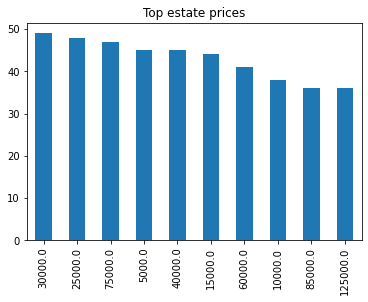

In [100]:
realestate['SoldPrice'].value_counts().head(10).plot(kind='bar', title = 'Top estate prices')

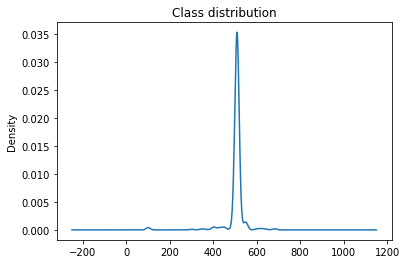

In [105]:
realestate['property_class'].plot(kind = 'kde', title= 'Class distribution')

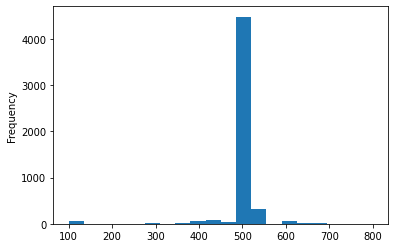

In [104]:
realestate['property_class'].plot(kind = 'hist', bins = 20)

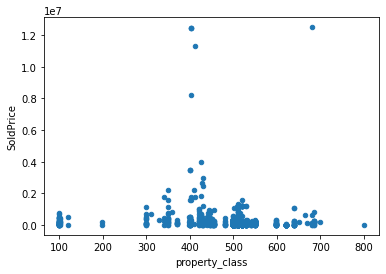

In [112]:
realestate.plot(kind='scatter', x= 'property_class', y= 'SoldPrice')


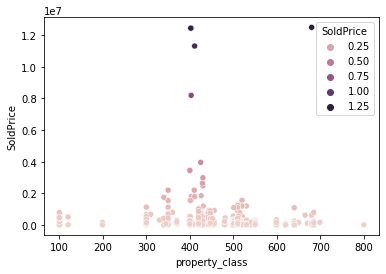

In [113]:
sns.scatterplot(x= 'property_class', y= 'SoldPrice', hue='SoldPrice', data = realestate)

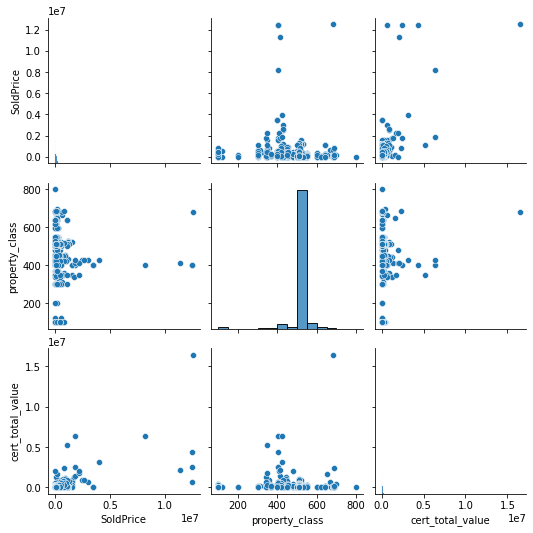

In [120]:
sns.pairplot(realestate, vars = ['SoldPrice', 'property_class', 'cert_total_value'])


Text(0, 0.5, 'Estate price')

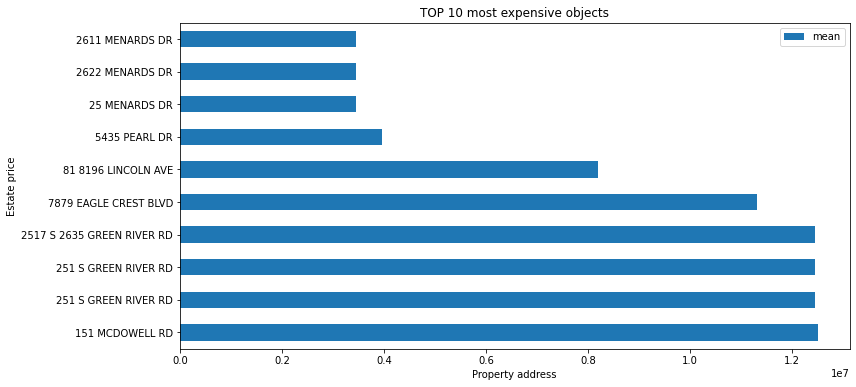

In [9]:
ax = realestate.query('property_addr != "NaN"').groupby(['owner_state', 'property_addr', 'property_class'])['SoldPrice'] \
                .agg(['mean', 'count']).reset_index() \
                .sort_values('mean', ascending=False).head(10) \
                .plot(kind='barh', figsize=(12, 6), x='property_addr', y='mean', title = 'TOP 10 most expensive objects')
ax.set_xlabel('Property address')
ax.set_ylabel('Estate price')


In [12]:
realestate.columns

Index(['OBJECTID', 'NAME', 'StatePIN', 'legal_description', 'property_addr',
       'cert_land_value', 'cert_improvement_value', 'cert_total_value',
       'owner1', 'owner2', 'owner_street', 'owner_city', 'owner_state',
       'owner_zip', 'grade', 'year_built', 'condition', 'property_class',
       'nbhd', 'SoldPrice', 'ConveyanceDate', 'legal_ac',
       'SpecialCircumstances2', 'Shape_Area'],
      dtype='object')